In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [13]:
df = pd.read_csv('117 01Students.csv')
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [15]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [16]:
df.isnull().sum()

Hours    0
Marks    0
dtype: int64

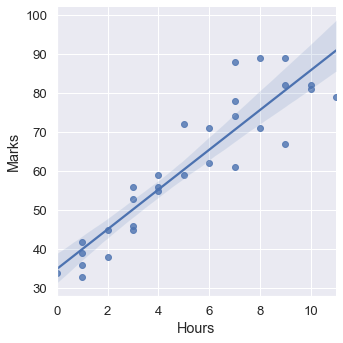

In [17]:
sns.lmplot(x='Hours',y='Marks',data=df)
#It's a postive linear relation

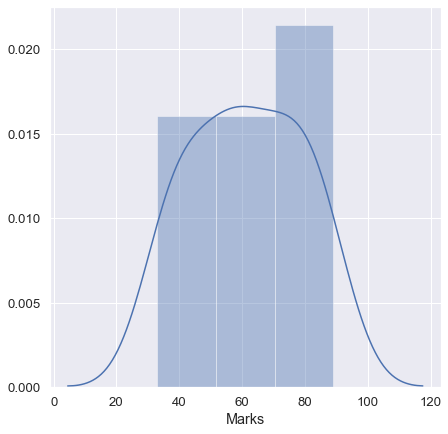

In [18]:
#chack what i'm trying to predict to see the distribtuion
sns.distplot(df["Marks"])

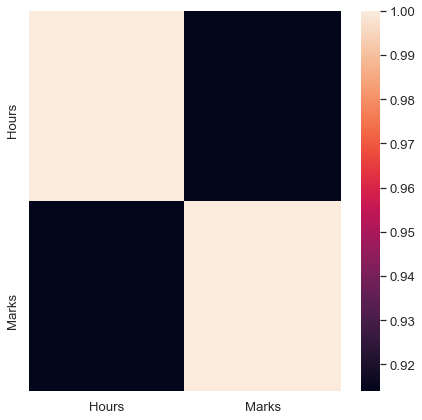

In [19]:
#check corr between columns, it's strong
sns.heatmap(df.corr())

In [20]:
x = df["Hours"].values.reshape(-1, 1)
y = df["Marks"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(x_train,y_train)

LinearRegression()

In [24]:
df.columns

Index(['Hours', 'Marks'], dtype='object')

In [25]:
lm.coef_

array([5.20181178])

In [26]:
lm.intercept_

35.70608958228486

In [27]:
y_hat = lm.predict(x_test)
y_hat

array([72.11877202, 82.52239557, 51.31152491, 72.11877202, 40.90790136,
       87.72420735, 82.52239557, 66.91696024, 82.52239557])

In [28]:
y_test

20    61
24    82
7     45
18    78
2     33
27    81
26    89
16    62
25    67
Name: Marks, dtype: int64

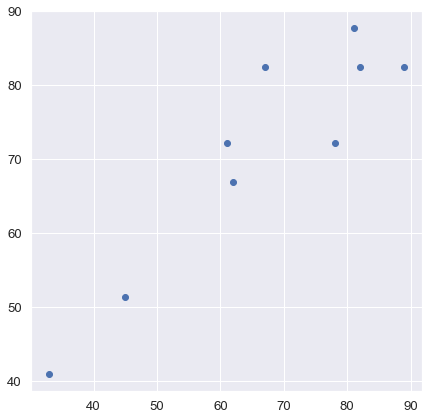

In [29]:
#show and compare predited values vs actual, it seems like a good model for this data
plt.scatter(y_test,y_hat)

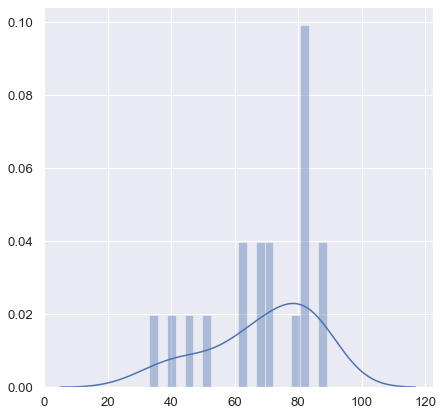

In [30]:
#use resenduial histogram between predicted values vs actual
sns.distplot((y_test,y_hat), bins=20)

In [31]:
#calculate MSE
lm.score(x_test, y_hat)

1.0

In [34]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, y_hat))

8.253986695944043